# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

In [2]:
#En primer lugar, nos aseguramos de instalar el paquete requests y pandas para luego importarlo a nuestro código
#%pip install requests 
#%pip install pandas
#%pip install matplotlib
import requests 
import pandas as pd
import matplotlib.pyplot as plt

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [8]:
#Obtenemos los datos, junto a su matriz json para obtener el listado de mercadería relacionado a la búsqueda
buscar = "Whisky Johnny Walker"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
data = response.json()
#Iniciamos el listado de objetos en nuestros resultados de busqueda
p = 0
listado=[]
while p<len(data['results']):
    item = data['results'][p]['title']
    listado.append(item)
    p=p+1
print(listado)

{'site_id': 'MLA', 'country_default_time_zone': 'GMT-03:00', 'query': 'Whisky Johnny Walker', 'paging': {'total': 159, 'primary_results': 159, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLA1387600999', 'title': 'Whisky Johnnie Walker Red Label X 1 Litro', 'condition': 'new', 'thumbnail_id': '776209-MLU75135397647_032024', 'catalog_product_id': 'MLA19788144', 'listing_type_id': 'gold_special', 'permalink': 'https://www.mercadolibre.com.ar/whisky-johnnie-walker-red-label-x-1-litro/p/MLA19788144', 'buying_mode': 'buy_it_now', 'site_id': 'MLA', 'category_id': 'MLA10511', 'domain_id': 'MLA-WHISKEYS', 'thumbnail': 'http://http2.mlstatic.com/D_776209-MLU75135397647_032024-I.jpg', 'currency_id': 'ARS', 'order_backend': 1, 'price': 30838, 'original_price': None, 'sale_price': None, 'available_quantity': 1, 'official_store_id': None, 'use_thumbnail_id': True, 'accepts_mercadopago': True, 'shipping': {'store_pick_up': False, 'free_shipping': True, 'logistic_type': 'cross_docking', 'mode': 'me

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [16]:
#Procedemos similarmente al punto anterior para formular un catalogo que incluya el nombre de las publicaciones junto a su precio.
p = 0
Precios=[]
while p<len(data['results']):
    item = data['results'][p]['price']
    Precios.append(item)
    p=p+1
print(Precios)
#realizamos una lista llamada catalogo para unir a ella en forma de diccionario las variables pertenecientes a Precios y listado
p = 0
catalogo=[]
while p<len(data['results']):
    catalogo.append({'Item':listado[p], 'Precio':Precios[p]})

    p=p+1
print(catalogo)
#Convertimos la lista en un dataframe con pandas
catalogo_df=pd.DataFrame(catalogo)
catalogo_df

[30838, 50131.64, 349440, 56990.5, 22999, 79990, 53829, 87459, 39780, 49706, 91345.26, 59900, 61000, 69000, 37948, 28950, 89000, 47633, 71345, 84999, 93150, 37105.2, 100785, 59900, 29817.92, 54999, 36810, 59320.79, 47698, 29940, 55700, 43500, 51116.68, 49924, 54680.5, 120000, 71920, 46493, 127003.6, 34900, 53558.69, 49946, 143090, 58975, 51700, 36800, 166945, 43020, 61518.6, 104999]
[{'Item': 'Whisky Johnnie Walker Red Label X 1 Litro', 'Precio': 30838}, {'Item': 'Johnnie Walker Black Label X Litro', 'Precio': 50131.64}, {'Item': 'Johnnie Walker Blue Label X750cc', 'Precio': 349440}, {'Item': 'Johnnie Walker Black Label 1 Litro Con Estuche', 'Precio': 56990.5}, {'Item': 'Whisky Escocés Blended Red Label Johnnie Walker 750ml', 'Precio': 22999}, {'Item': 'Whisky Johnny Walker Jw Gold Label Reserve Johnnie 750ml', 'Precio': 79990}, {'Item': 'Whisky Johnnie Walker Double Black 750cc - Origen Escocia', 'Precio': 53829}, {'Item': 'Whisky Johnnie Walker Swing Escoces Blended 750ml', 'Precio':

,Item,Precio
0,Whisky Johnnie Walker Red Label X 1 Litro,30838.00
1,Johnnie Walker Black Label X Litro,50131.64
2,Johnnie Walker Blue Label X750cc,349440.00
3,Johnnie Walker Black Label 1 Litro Con Estuche,56990.50
4,Whisky Escocés Blended Red Label Johnnie Walke...,22999.00
5,Whisky Johnny Walker Jw Gold Label Reserve Joh...,79990.00
6,Whisky Johnnie Walker Double Black 750cc - Ori...,53829.00
7,Whisky Johnnie Walker Swing Escoces Blended 750ml,87459.00
8,Whisky Johnny Walker Importado Johnnie Black L...,39780.00
9,Whisky Johnnie Walker Double Black Blended Esc...,49706.00


In [25]:
#Utilizamos las funciones de los dataframes para buscar los valores deseados, marcando que los valores deben pertenecer a la columna de Precio
media = catalogo_df['Precio'].mean()
maximo = catalogo_df['Precio'].max()
minimo = catalogo_df['Precio'].min()
print(f"La media del catalogo es {media}. Asimismo, el maximo y minimo son {maximo} y {minimo} respectivamente")

68751.9876
349440.0
22999.0
La media del catalogo es 68751.9876. Asimismo, el maximo y minimo son 349440.0 y 22999.0 respectivamente


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

Text(0.5, 1.0, 'Histograma de precios')

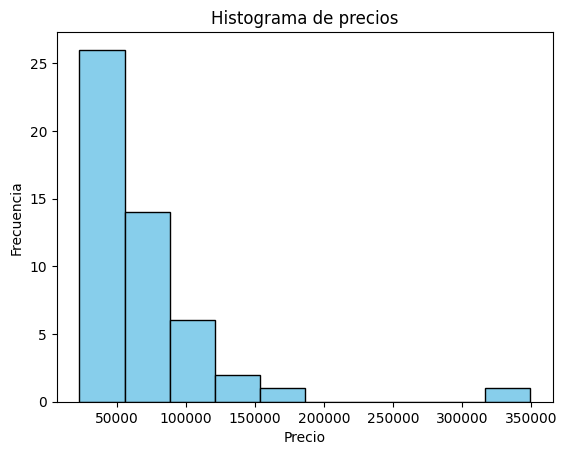

In [31]:
plt.hist(catalogo_df['Precio'], color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')
#Observamos un outlier notorio, el cual se puede deber a que el valor de un whisky varia en base a muchas variables, como el tipo de barrica utilizada...
#O el tiempo que se mantuvo estacionado. Esto sucede aun bajo la misma marca.

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [14]:
#En este bloque repetimos el primer paso utilizado en el ejericio 1 con el fin de obtener el id de la categoria de nuestra busqueda
#Esto es bajo el supuesto de que la busqueda no es lo suficientemente amplia como para tener distintas categorias de productos.

buscar = "cartuchera de 3 pisos"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
data = response.json()
categoria = data['results'][0]['category_id']
print(categoria)
url = "https://api.mercadolibre.com/categories/{}".format(categoria)
response = requests.request("GET", url)
data = response.json()
data
#De esta manera conseguimos distintos datos sobre la categoria que buscamos, como la cantidad de productos bajo esta categoria, los metodos de compra y 
#las condiciones en las cuales podemos encontrar los productos.

MLA105385


{'id': 'MLA105385',
 'name': 'Cartucheras',
 'picture': None,
 'permalink': None,
 'total_items_in_this_category': 25675,
 'path_from_root': [{'id': 'MLA1368', 'name': 'Arte, Librería y Mercería'},
  {'id': 'MLA5982', 'name': 'Librería'},
  {'id': 'MLA455745', 'name': 'Escolar'},
  {'id': 'MLA105385', 'name': 'Cartucheras'}],
 'children_categories': [],
 'attribute_types': 'variations',
 'settings': {'adult_content': False,
  'buying_allowed': True,
  'buying_modes': ['buy_it_now', 'auction'],
  'catalog_domain': 'MLA-PENCIL_CASES',
  'coverage_areas': 'not_allowed',
  'currencies': ['ARS'],
  'fragile': False,
  'immediate_payment': 'required',
  'item_conditions': ['not_specified', 'used', 'new'],
  'items_reviews_allowed': False,
  'listing_allowed': True,
  'max_description_length': 50000,
  'max_pictures_per_item': 12,
  'max_pictures_per_item_var': 10,
  'max_sub_title_length': 70,
  'max_title_length': 60,
  'max_variations_allowed': 100,
  'maximum_price': None,
  'maximum_pric

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.